Simple MAE: 0.629908653009376
Simple MSE: 0.7091157771765549
Simple R²: 0.45885918903846656


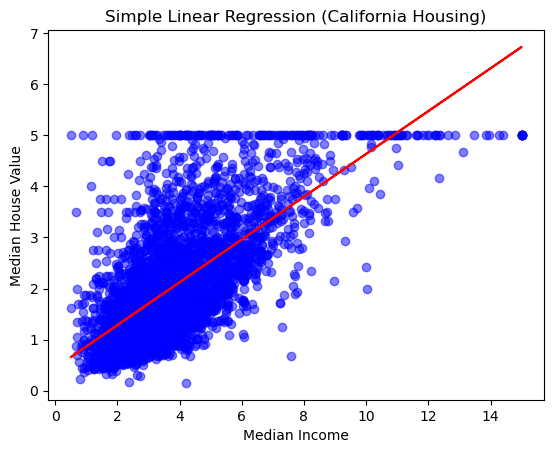

Multiple MAE: 0.5332001304956564
Multiple MSE: 0.555891598695244
Multiple R²: 0.5757877060324511


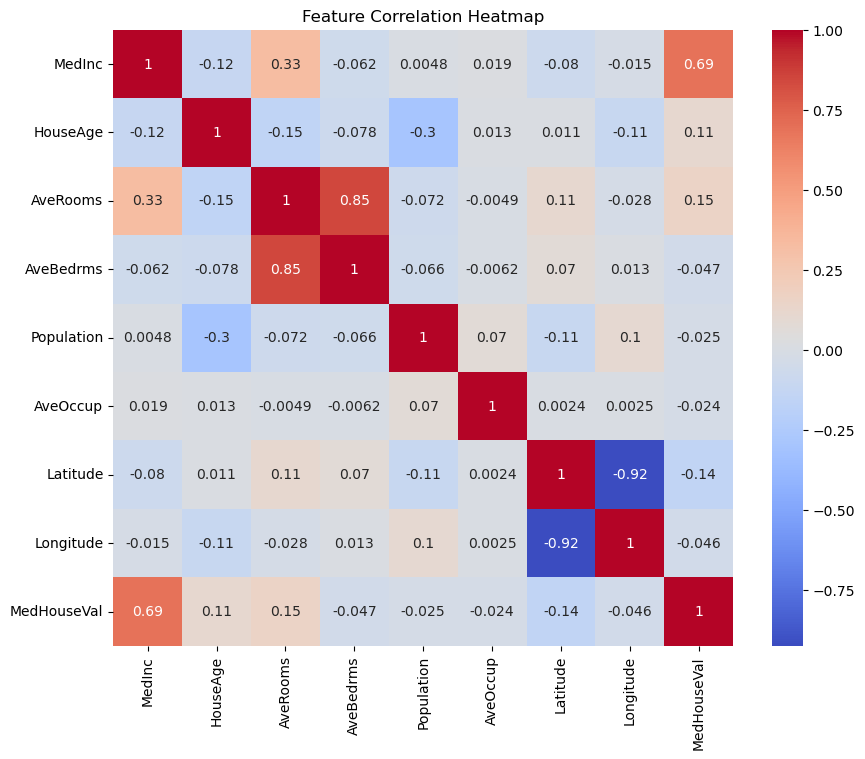


Variance Inflation Factors:
      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [1]:
# Task 3 - Linear Regression Implementation (Simple & Multiple) with California Housing Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import fetch_california_housing

# --- Load California housing dataset ---
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# --- Simple Linear Regression (e.g., MedInc vs MedHouseVal) ---
X_simple = df[['MedInc']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

print("Simple MAE:", mean_absolute_error(y_test, y_pred_simple))
print("Simple MSE:", mean_squared_error(y_test, y_pred_simple))
print("Simple R²:", r2_score(y_test, y_pred_simple))

plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred_simple, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression (California Housing)")
plt.show()

# --- Multiple Linear Regression ---
X_multi = df.drop("MedHouseVal", axis=1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_test_m)

print("Multiple MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("Multiple MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("Multiple R²:", r2_score(y_test_m, y_pred_multi))

# --- Correlation heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# --- VIF check (to detect multicollinearity) ---
vif_data = pd.DataFrame()
vif_data["feature"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i)
                   for i in range(X_multi.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)
